In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from patsy import dmatrices
import statsmodels.api as sm
from utilities import *

In [2]:
# importing the feature file
path= './'
file= 'SegmentFeatures2.csv'
data= pd.read_csv(path+file, delimiter=',')
display(data.head())

,SegmentId,RecordNum,StartingTime,RRBreach,SpO2Breach,RRHighRegions,SpO2LowRegions,Stage1OccurL,Stage2OccurL,Stage3OccurL,RRUnsafeRegions,SpO2UnsafeRegions,Stage1OccurH,Stage2OccurH,Stage3OccurH,FeatureSum,Type1Pattern
0,Seg0,3861446,30.0,0,0,0,0,2,0,1,12,7,1,0,0,23,1
1,Seg1,3861446,31.0,0,0,0,0,3,0,1,12,7,1,0,0,24,1
2,Seg2,3861446,32.0,0,0,0,0,2,0,1,12,6,1,0,0,22,1
3,Seg3,3861446,4.0,0,1,0,1,5,1,1,2,3,0,0,0,14,1
4,Seg4,3861446,8.0,0,1,0,1,4,1,1,4,4,1,0,0,17,1


In [3]:
X=data[['RRBreach', 'SpO2Breach',
       'RRHighRegions', 'SpO2LowRegions', 'Stage1OccurL', 'Stage2OccurL',
       'Stage3OccurL', 'RRUnsafeRegions', 'SpO2UnsafeRegions', 'Stage1OccurH',
       'Stage2OccurH', 'Stage3OccurH']]
X.head()

,RRBreach,SpO2Breach,RRHighRegions,SpO2LowRegions,Stage1OccurL,Stage2OccurL,Stage3OccurL,RRUnsafeRegions,SpO2UnsafeRegions,Stage1OccurH,Stage2OccurH,Stage3OccurH
0,0,0,0,0,2,0,1,12,7,1,0,0
1,0,0,0,0,3,0,1,12,7,1,0,0
2,0,0,0,0,2,0,1,12,6,1,0,0
3,0,1,0,1,5,1,1,2,3,0,0,0
4,0,1,0,1,4,1,1,4,4,1,0,0


In [4]:
Y=data[['Type1Pattern']]
Y.head()

,Type1Pattern
0,1
1,1
2,1
3,1
4,1


In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/4,random_state = 10)
display(y_test['Type1Pattern'].value_counts(normalize=True) * 100)
display(y_train['Type1Pattern'].value_counts(normalize=True) * 100)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
print(np.shape(y_train))
print(np.shape(y_test))

0    51.851852
1    48.148148
Name: Type1Pattern, dtype: float64

1    50.353357
0    49.646643
Name: Type1Pattern, dtype: float64

(1132,)
(378,)


In [6]:
#SVM implementation
from sklearn.svm import SVC
clf_svc = SVC(random_state=10,probability=True)
clf_svc.fit(X_train,y_train)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=10,
    shrinking=True, tol=0.001, verbose=False)

[[184  12]
 [  8 174]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       196
           1       0.94      0.96      0.95       182

    accuracy                           0.95       378
   macro avg       0.95      0.95      0.95       378
weighted avg       0.95      0.95      0.95       378



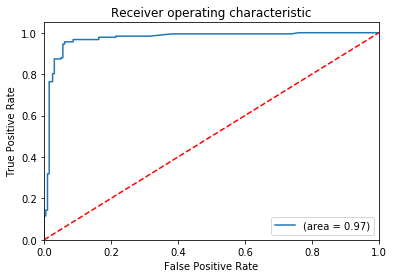

0.5489226079636985

Model Classification stats with Optimal Threshold
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       196
           1       0.94      0.95      0.94       182

    accuracy                           0.94       378
   macro avg       0.94      0.94      0.94       378
weighted avg       0.94      0.94      0.94       378



,Value
accuracy,0.944444
recall,0.950549
precision,0.935135
f1-score,0.942779
roc_auc_score,0.971546


In [7]:
metrics_analysis(X_test,y_test,clf_svc)
optimal_threshold=plot_rocauc(X_test,y_test,clf_svc)
print('Model Classification stats with Optimal Threshold')
display_classification_metrics(X_test,y_test,clf_svc,optimal_threshold)

In [8]:
#SVM implementation
from sklearn.svm import SVC
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
c_vals = [0.00001, 0.0001, 0.01, 0.1, 1, 5, 10, 100, 1000]


c_vals = [0.1, 1, 5, 10, 100, 1000]
param_grid = [
  {'C': c_vals, 'gamma': [0.1, 0.01, 0.001, 0.0001, 0.00001], 'kernel': ['rbf','linear']},
 ]
grid= GridSearchCV(SVC(random_state=10),param_grid,n_jobs=-1, verbose=1, cv=5)
model=grid.fit(X_train,y_train)

#To get best params
print(model.best_params_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    7.0s


{'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.2min finished


In [9]:
svc_bestparam = SVC(C=5,gamma=0.1,kernel='rbf',probability=True, random_state=10)
svc_bestparam.fit(X_train,y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

[[182  14]
 [ 13 169]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       196
           1       0.92      0.93      0.93       182

    accuracy                           0.93       378
   macro avg       0.93      0.93      0.93       378
weighted avg       0.93      0.93      0.93       378



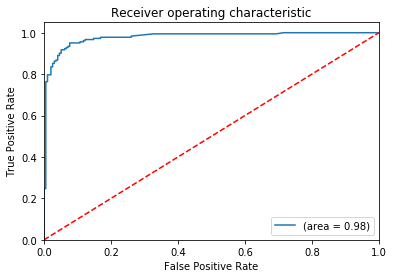

0.370932138906795

Model Classification stats with Optimal Threshold
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       196
           1       0.92      0.95      0.93       182

    accuracy                           0.93       378
   macro avg       0.93      0.93      0.93       378
weighted avg       0.93      0.93      0.93       378



,Value
accuracy,0.933862
recall,0.945055
precision,0.919786
f1-score,0.932249
roc_auc_score,0.978527


In [10]:
metrics_analysis(X_test,y_test,svc_bestparam)
optimal_threshold=plot_rocauc(X_test,y_test,svc_bestparam)
print('Model Classification stats with Optimal Threshold')
display_classification_metrics(X_test,y_test,svc_bestparam,optimal_threshold)

### -------------------Final Model-----------------------------
##### Splitting into training and testing
##### Training : 0:500 = 500
##### Training : 752:1252 = 500
##### Test: 500:752  = 252
##### Test: 1252:1510 = 258

In [11]:
# importing the feature file
datafile_path= './'
datafile_name= 'SegmentFeatures2.csv'
data= pd.read_csv(datafile_path+datafile_name, delimiter=',')
X=data[['RRBreach', 'SpO2Breach',
       'RRHighRegions', 'SpO2LowRegions', 'Stage1OccurL', 'Stage2OccurL',
       'Stage3OccurL', 'RRUnsafeRegions', 'SpO2UnsafeRegions', 'Stage1OccurH',
       'Stage2OccurH', 'Stage3OccurH']]
Y=data[['Type1Pattern']]
X_TRAIN = np.concatenate((X.values[0:500,:],X.values[752:1252,:]),axis=0)
Y_TRAIN = np.concatenate((Y.values[0:500],Y.values[752:1252]),axis=0)
Y_TRAIN = Y_TRAIN.ravel()

X_TEST = np.concatenate((X.values[500:752,:],X.values[1252:1510,:]),axis=0)
Y_TEST = np.concatenate((Y.values[500:752],Y.values[1252:1510]),axis=0)
Y_TEST = Y_TEST.ravel()
print(np.shape(X_TRAIN))
print(np.shape(Y_TRAIN))
print(np.shape(X_TEST))
print(np.shape(Y_TEST))


(1000, 12)
(1000,)
(510, 12)
(510,)


[[219  39]
 [ 20 232]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       258
           1       0.86      0.92      0.89       252

    accuracy                           0.88       510
   macro avg       0.89      0.88      0.88       510
weighted avg       0.89      0.88      0.88       510



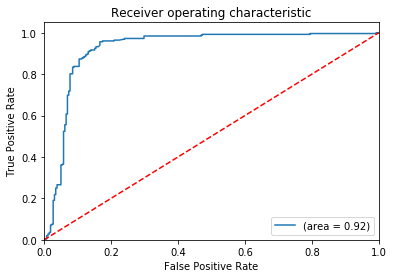

0.3906949249099198

Model Classification stats with Optimal Threshold
              precision    recall  f1-score   support

           0       0.95      0.83      0.89       258
           1       0.85      0.95      0.90       252

    accuracy                           0.89       510
   macro avg       0.90      0.89      0.89       510
weighted avg       0.90      0.89      0.89       510



,Value
accuracy,0.892157
recall,0.952381
precision,0.848057
f1-score,0.897196
roc_auc_score,0.922781


In [12]:
svc_bestparam = SVC(C=5,gamma=0.1,kernel='rbf',probability=True, random_state=10)
svc_bestparam.fit(X_TRAIN, Y_TRAIN)

metrics_analysis(X_TEST,Y_TEST,svc_bestparam)
optimal_threshold=plot_rocauc(X_TEST,Y_TEST,svc_bestparam)
print('Model Classification stats with Optimal Threshold')
display_classification_metrics(X_TEST,Y_TEST,svc_bestparam,optimal_threshold)

In [13]:
import pickle

# save the model to disk
model_path= './'
model_name = 'svm_model.sav'
pickle.dump(svc_bestparam, open(model_path+model_name, 'wb'))